<a href="https://colab.research.google.com/github/miftaadiwira16/Sales-Data-Analysis-With-Python/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Data Analysis

Created by Mifta Adiwira Jati Jaka

This dataset contain a sales data with thousands of store purchases broken down by month, product type, cost, purchase address, etc.

In this contents, we want to know about:
  - What is the overall sales trend?
  - Which are the Top 10 products by sales?
  - Which are the Most Selling Products?
  - Which is the most preferred Ship Mode?
  - Which are the Most Profitable Category and Sub-Category?

In [5]:
# Import library
import io

# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Upload data from local to google colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving superstore_sales.xlsx to superstore_sales.xlsx
User uploaded file "superstore_sales.xlsx" with length 6888951 bytes


In [6]:
# read dataset
data = pd.read_excel(io.BytesIO(uploaded['superstore_sales.xlsx']))
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [8]:
# Shape of dataset
data.shape

(51290, 21)

From the shape of dataset, we know this dataset has:
  - 51290 rows
  - 21 columns

In [9]:
# check missing value
check_null = pd.DataFrame(data.dtypes).T.rename({0: "Column Type"})
check_null = check_null.append(pd.DataFrame(data.isnull().sum()).T.rename({0: "Number of Null Values"}))
check_null

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
Column Type,object,datetime64[ns],datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,float64,int64,float64,float64,float64,object,int64
Number of Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This dataset has no missing values and we can start doing further analysis on this dataset.

In [11]:
# descriptive statistics summary
data.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


### EXPLORATORY DATA ANALYSIS

  - **WHAT IS THE OVERALL SALES TREND?**

In [20]:
# We want to know the minimum date from dataset
data['order_date'].min()

Timestamp('2011-01-01 00:00:00')

the minimum date is 01 January 2011

In [21]:
# We want to know the maximum date from dataset
data['order_date'].max()

Timestamp('2014-12-31 00:00:00')

the maximum date is 31 December 2014

In [13]:
# Generating order_date into month year
data['month_year'] = data['order_date'].apply(lambda x: x.strftime('%m-%Y'))
data['month_year']

0        01-2011
1        01-2011
2        01-2011
3        01-2011
4        01-2011
          ...   
51285    12-2014
51286    12-2014
51287    12-2014
51288    12-2014
51289    12-2014
Name: month_year, Length: 51290, dtype: object

In [57]:
# Grouping month_year by sum of all sales per month
data_trend = data.groupby('month_year').sum()['sales'].reset_index()
data_trend.head()

,month_year,sales
0,01-2011,98898.48886
1,01-2012,135780.72024
2,01-2013,199185.90738
3,01-2014,241268.55566
4,02-2011,91152.15698


In [58]:
data_trend.tail()

,month_year,sales
43,11-2014,555279.02700
44,12-2011,333925.73460
45,12-2012,338256.96660
46,12-2013,405454.37802
47,12-2014,503143.69348


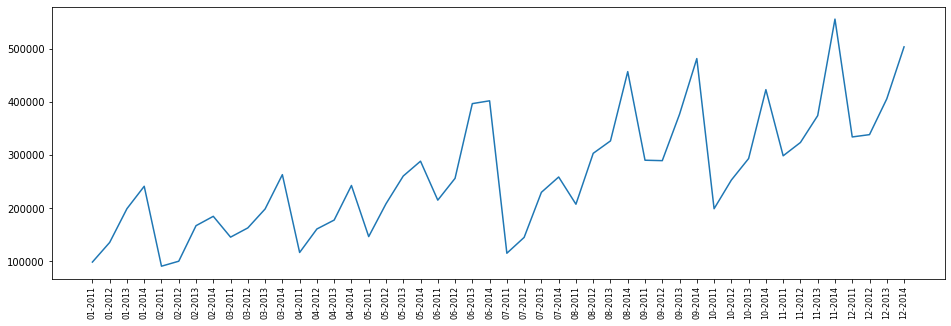

In [26]:
# Data Visualization of sales trend
plt.figure(figsize=(16, 5))
plt.plot(data_trend['month_year'], data_trend['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

  - **WHICH ARE THE TOP 10 PRODUCTS BY SALES?**

In [28]:
# Grouping product_name by sales
top_10_prod = pd.DataFrame(data.groupby('product_name').sum()['sales'])
top_10_prod

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [30]:
# Sorting top_10_prod in descending order
top_10_prod.sort_values(by=['sales'], inplace=True, ascending=False)
top_10_prod[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<Figure size 864x432 with 0 Axes>

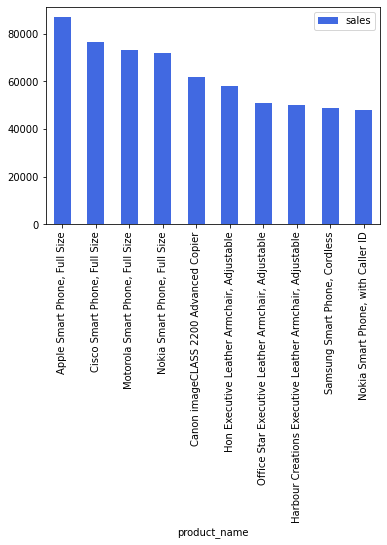

In [32]:
# Showing top 10 product
plt.figure(figsize=(12, 6))
top_10_prod[:10].plot(kind='bar', color='royalblue')

  - **WHICH ARE THE MOST SELLING PRODUCTS?**

In [36]:
# Grouping product_name by quantity
most_selling_prods = pd.DataFrame(data.groupby('product_name').sum()['quantity'])
most_selling_prods

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [39]:
# Sorting the dataframe in descending order
most_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)
most_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<Figure size 864x432 with 0 Axes>

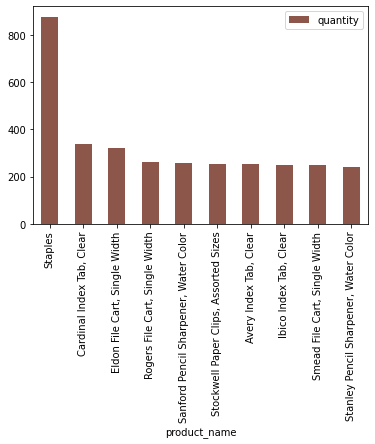

In [41]:
# Showing the most selling products
plt.figure(figsize=(12, 6))
most_selling_prods[:10].plot(kind='bar', color='tab:brown')

  - **WHAT IS THE MOST PREFERRED SHIP MODE?**

In [45]:
# Showing count of unique value ship_mode
most_prefer_ship = data.value_counts('ship_mode')
most_prefer_ship

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
dtype: int64

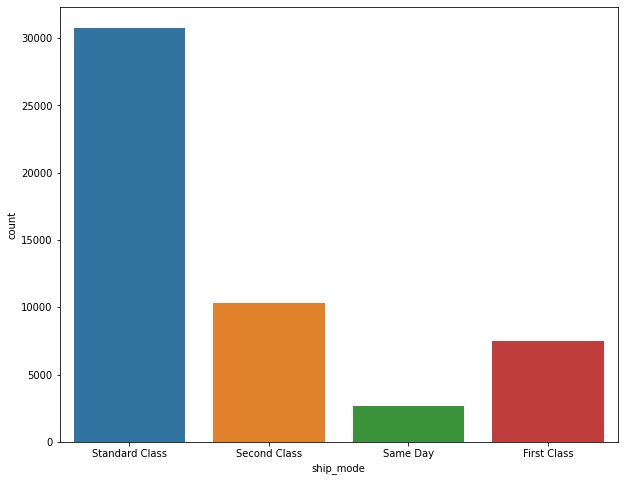

In [52]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=data)

# Display the figure
plt.show()

  - **WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?**

In [55]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(data.groupby(['category', 'sub_category']).sum()['profit'].round())

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category          
Technology      Copiers       258568.0
                Phones        216717.0
                Accessories   129626.0
                Machines       58868.0
Office Supplies Appliances    141681.0
                Storage       108461.0
                Binders        72450.0
                Paper          59208.0
                Art            57954.0
                Envelopes      29601.0
                Supplies       22583.0
                Labels         15011.0
                Fasteners      11525.0
Furniture       Bookcases     161924.0
                Chairs        141974.0
                Furnishings    46967.0
                Tables        -64083.0

### The Summary of The Content:

- What is the overall sales trend?
  - From the line graph above, we know that overall sales trend is increased from 98898 to 503143 between january 2011 and december 2014. Although, the trend shows that has rise and fall in a significant month.

- Which are the Top 10 products by sales?
  
  There are top 10 products by sales, which are:
  - Apple Smart Phone, Full Size
  - Cisco Smart Phone, Full Size
  - Motorola Smart Phone, Full Size
  - Nokia Smart Phone, Full Size
  - Canon imageCLASS 2200 Advanced Copier
  - Hon Executive Leather Armchair, Adjustable
  - Office Star Executive Leather Armchair, Adjustable
  - Harbour Creations Executive Leather Armchair, Adjustable
  - Samsung Smart Phone, Cordless
  - Nokia Smart Phone, with Caller ID

- WHICH ARE THE MOST SELLING PRODUCTS?

  There are the most selling products, which are:
  - Staples
  - Cardinal Index Tab, Clear
  - Eldon File Cart, Single Width
  - Rogers File Cart, Single Width
  - Sanford Pencil Sharpener, Water Color	
  - Stockwell Paper Clips, Assorted Sizes	
  - Avery Index Tab, Clear	
  - Ibico Index Tab, Clear	
  - Smead File Cart, Single Width	
  - Stanley Pencil Sharpener, Water Color	

- WHAT IS THE MOST PREFERRED SHIP MODE?
  - The most preferred ship mode is Standard Class

- WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?
  
  The Most Profitable category and sub-category is:
  - Technology - Copiers
  - Office Supplies - Appliances
  - Furniture - Bookcases 